<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Выбор-локации-для-скважины" data-toc-modified-id="Выбор-локации-для-скважины-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Выбор локации для скважины</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li></ul></li><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span><ul class="toc-item"><li><span><a href="#-Комментарий-ревьюера" data-toc-modified-id="-Комментарий-ревьюера-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span> Комментарий ревьюера</a></span></li></ul></li></ul></div>

<div class="alert alert-info">
Привет! Меня зовут Никита Мишин и я буду твоим ревьюером по этому проекты.
Для простоты предлагаю общение на 'ты'. Буду предполагать, что ты не против:) 
Если более предпочтительно обращение на 'Вы', пиши, не стесняйся.
Также если будут возникать вопросы, аналогично, пиши:)

Предлагаю работать в известном тебе итеративном формате.
Итерация состоит в моей проверке твоего решения. 
После решения могут остаться какие-то недочеты, которые я попрошу тебя устранить, ты их исправляешь и я проверяю твои решения.
    Оставленные мною комментарии могут быть разного вида:
   
    - зеленый: элегантные решения, которые тебе стоит запомнит и в дальнейшем взять на вооружение:) 
    
    - желтый: сигнал о том, что есть некритичная вещь(не всегда ошибка), что нужно точно поправить в следующей работе, даже желательно в этой (полезно, в первую очередь, для тебя:) ).Также это рекомендации на будущее    

    - красный: недочет, который нужно исправить в этой работе, для того, чтобы она была принята
    
    - синий: полезная информация, доп ресурсы, "вопросы на подумать"

Также попрошу не удалять мои комментарии:) <a class="tocSkip">
</div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Описание данных


Данные геологоразведки трёх регионов находятся в файлах:  
/datasets/geo_data_0.csv. Скачать датасет  
/datasets/geo_data_1.csv. Скачать датасет  
/datasets/geo_data_2.csv. Скачать датасет  
id — уникальный идентификатор скважины;  
f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);  
product — объём запасов в скважине (тыс. баррелей).

# Загрузка и подготовка данных

In [17]:
!pip install seaborn>=0.11 -U

In [18]:
#загрузка библиотек
import pandas as pd
#установим точность float 2 знака
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("precision", 3)
#графика
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
#
import numpy as np
from scipy import stats as st
#
#машинное обучение
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
pd.options.mode.chained_assignment = None
#модели
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn.dummy import DummyClassifier
#метрики
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error 
#работа с дисбалансом
from sklearn.utils import shuffle
#
from IPython.display import display, HTML, display_html
# importing "copy" for copy operations 
import copy

Таблица data0


,id,f0,f1,f2,product
0,txEyH,0.706,-0.498,1.221,105.280
1,2acmU,1.335,-0.340,4.365,73.038
2,409Wp,1.023,0.152,1.420,85.266
3,iJLyR,-0.032,0.139,2.979,168.621
4,Xdl7t,1.988,0.155,4.752,154.037
5,wX4Hy,0.970,0.490,-0.735,64.742
6,tL6pL,0.645,0.531,1.780,49.055
7,BYPU6,-0.401,0.808,-5.625,72.943
8,j9Oui,0.643,-0.552,2.372,113.356
9,OLuZU,2.173,0.564,9.442,127.911


(100000, 5)

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

,percent_of_nulls
id,0.00%
f0,0.00%
f1,0.00%
f2,0.00%
product,0.00%


,f0,f1,f2,product
count,100000.000,100000.000,100000.000,100000.000
mean,0.500,0.250,2.503,92.500
std,0.872,0.504,3.248,44.289
min,-1.409,-0.848,-12.088,0.000
25%,-0.073,-0.201,0.288,56.498
50%,0.502,0.250,2.516,91.850
75%,1.074,0.701,4.715,128.564
max,2.362,1.344,16.004,185.364


Количество полных дубликатов: 0

id
74z30    2
bsk9y    2
QcMuo    2
fiKDv    2
AGS9W    2
        ..
Q3fKj    1
1t57g    1
sgK95    1
CAJF7    1
oc7br    1
Name: id, Length: 99990, dtype: int64

Коэффициенты корреляции для data0 ['f0', 'f1', 'f2', 'product']


,f0,f1,f2,product
f0,1.000,-0.441,-0.003,0.144
f1,-0.441,1.000,0.002,-0.192
f2,-0.003,0.002,1.000,0.484
product,0.144,-0.192,0.484,1.000


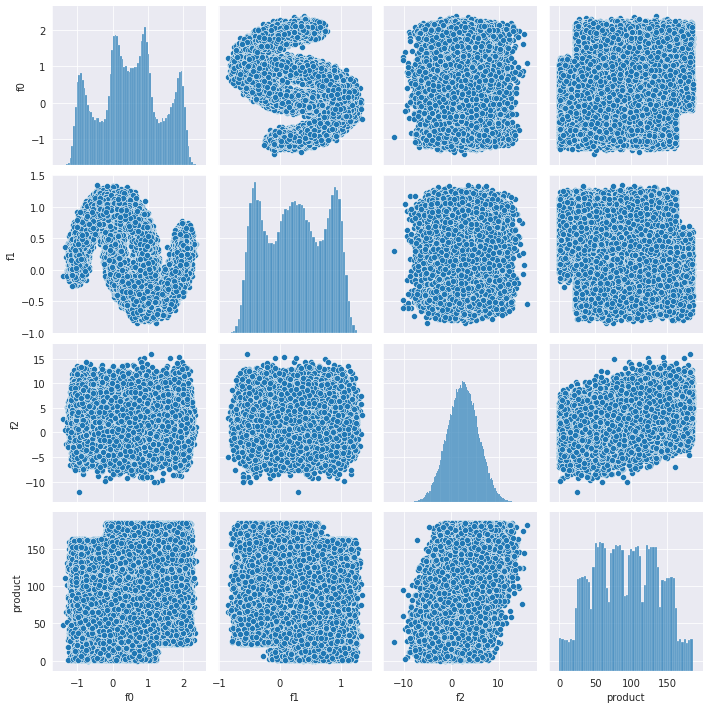

Уникальных строк по customerid: 100000
Таблица data1


,id,f0,f1,f2,product
0,kBEdx,-15.001,-8.276,-0.006,3.179
1,62mP7,14.272,-3.475,0.999,26.953
2,vyE1P,6.263,-5.948,5.001,134.766
3,KcrkZ,-13.081,-11.506,4.999,137.945
4,AHL4O,12.702,-8.147,5.004,134.766
5,HHckp,-3.328,-2.205,3.004,84.039
6,h5Ujo,-11.143,-10.133,4.002,110.992
7,muH9x,4.235,-0.001,2.005,53.907
8,YiRkx,13.355,-0.332,4.999,134.766
9,jG6Gi,1.069,-11.026,4.998,137.945


(100000, 5)

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

,percent_of_nulls
id,0.00%
f0,0.00%
f1,0.00%
f2,0.00%
product,0.00%


,f0,f1,f2,product
count,100000.000,100000.000,100000.000,100000.000
mean,1.141,-4.797,2.495,68.825
std,8.966,5.120,1.704,45.944
min,-31.610,-26.359,-0.018,0.000
25%,-6.299,-8.268,1.000,26.953
50%,1.153,-4.813,2.011,57.086
75%,8.621,-1.333,4.000,107.813
max,29.422,18.734,5.020,137.945


Количество полных дубликатов: 0

id
wt4Uk    2
bfPNe    2
5ltQ6    2
LHZR0    2
Pgtk9    1
        ..
rgFd2    1
HMlgV    1
kTeNO    1
GqiTq    1
XhLsQ    1
Name: id, Length: 99996, dtype: int64

Коэффициенты корреляции для data1 ['f0', 'f1', 'f2', 'product']


,f0,f1,f2,product
f0,1.000,0.182,-0.002,-0.030
f1,0.182,1.000,-0.003,-0.010
f2,-0.002,-0.003,1.000,0.999
product,-0.030,-0.010,0.999,1.000


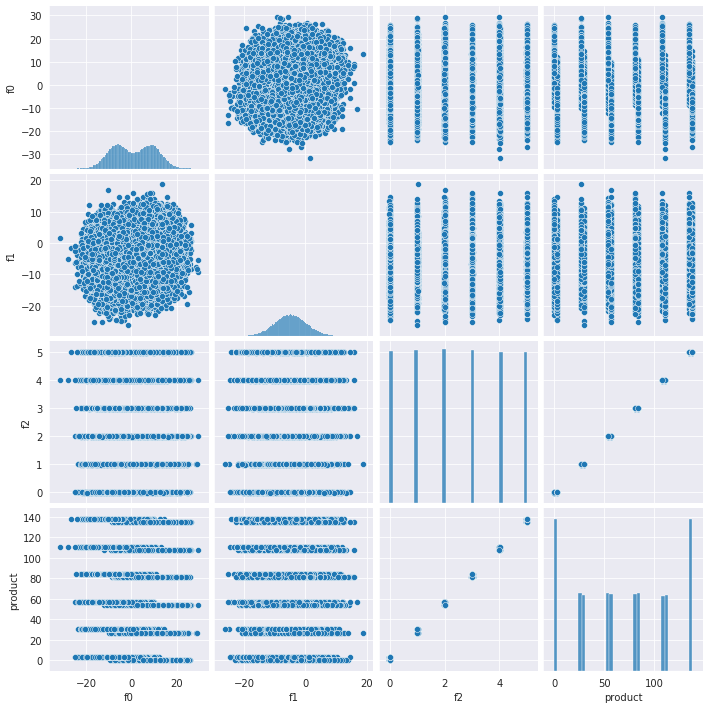

Уникальных строк по customerid: 100000
Таблица data2


,id,f0,f1,f2,product
0,fwXo0,-1.147,0.963,-0.829,27.759
1,WJtFt,0.263,0.270,-2.530,56.070
2,ovLUW,0.195,0.289,-5.586,62.872
3,q6cA6,2.236,-0.554,0.930,114.573
4,WPMUX,-0.516,1.716,5.899,149.601
5,LzZXx,-0.758,0.711,2.586,90.222
6,WBHRv,-0.575,0.318,1.774,45.641
7,XO8fn,-1.907,-2.458,-0.177,72.481
8,ybmQ5,1.776,-0.279,3.004,106.617
9,OilcN,-1.214,-0.439,5.923,52.955


(100000, 5)

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

,percent_of_nulls
id,0.00%
f0,0.00%
f1,0.00%
f2,0.00%
product,0.00%


,f0,f1,f2,product
count,100000.000,100000.000,100000.000,100000.000
mean,0.002,-0.002,2.495,95.000
std,1.732,1.730,3.473,44.750
min,-8.760,-7.084,-11.970,0.000
25%,-1.162,-1.175,0.130,59.450
50%,0.009,-0.009,2.484,94.926
75%,1.159,1.164,4.859,130.595
max,7.238,7.845,16.739,190.030


Количество полных дубликатов: 0

id
KUPhW    2
xCHr8    2
VF7Jo    2
Vcm5J    2
Fs7HL    1
        ..
CrdNr    1
rPoxg    1
r4Tx8    1
4dPjl    1
WjA1a    1
Name: id, Length: 99996, dtype: int64

Коэффициенты корреляции для data2 ['f0', 'f1', 'f2', 'product']


,f0,f1,f2,product
f0,1.000,0.001,-0.000,-0.002
f1,0.001,1.000,0.001,-0.001
f2,-0.000,0.001,1.000,0.446
product,-0.002,-0.001,0.446,1.000


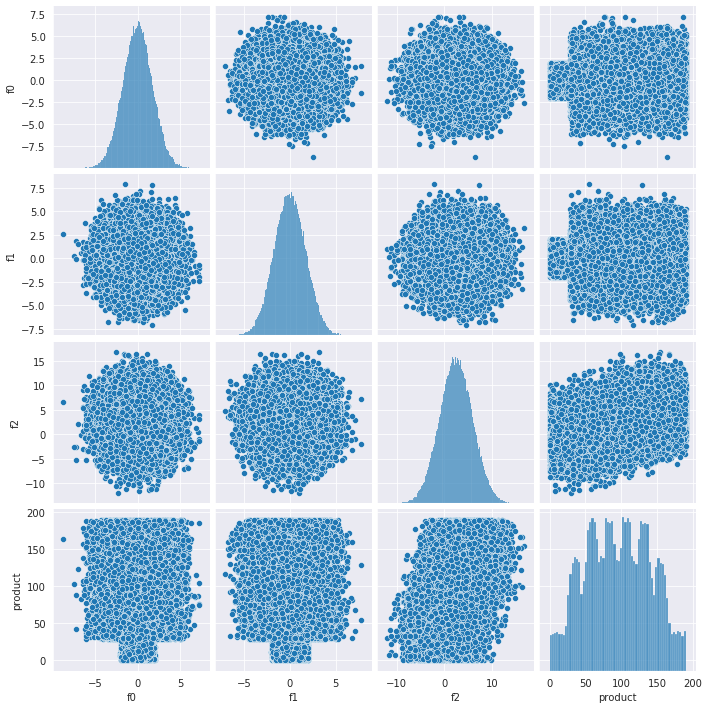

Уникальных строк по customerid: 100000
CPU times: user 1min 41s, sys: 2.49 s, total: 1min 43s
Wall time: 1min 45s


In [19]:
%%time

#откроем датасет
data0 = pd.read_csv('/datasets/geo_data_0.csv')
data0.name = 'data0'
data1 = pd.read_csv('/datasets/geo_data_1.csv')
data1.name = 'data1'
data2 = pd.read_csv('/datasets/geo_data_2.csv')
data2.name = 'data2'

#проанализируем данные
def data_exam(dat, number_column = None):
    #
    print('Таблица',dat.name)
    #столбцы к нижнему регистру
    dat.columns = dat.columns.str.lower()
    #
    display(dat.head(10))
    display(dat.shape)
    display(dat.dtypes)
    #посмотрим долю пустых значений в каждой колонке данных
    gaps_in_the_data = (pd
                    .DataFrame({'percent_of_nulls':dat.isna().sum()/len(dat)})
                    .sort_values(by='percent_of_nulls', ascending=False)
                   )
    gaps_in_the_data['percent_of_nulls'] = gaps_in_the_data['percent_of_nulls'].map(lambda x: '{:.2%}'.format(x))
    display(gaps_in_the_data)
    #посмотрим диапазоны значений
    display(dat.describe())
    #Посчитаем количество полных дубликатов
    print('Количество полных дубликатов:', dat.duplicated().sum())

    #посмотрим состав категоральных
    for feature in dat.select_dtypes('object'):
        print()
        print(feature)
        print(dat[feature].value_counts())
        
    #посмотрим распределение числовых данных
    if number_column == None:
        print('\nКоэффициенты корреляции для', dat.select_dtypes('number').columns)
        display(dat.select_dtypes('number').corr())
        sns.pairplot(dat.select_dtypes('number'))
    else:
        print('\nКоэффициенты корреляции для', dat.name, number_column)
        display(dat[number_column].corr())
        sns.pairplot(dat[number_column])
    plt.show()
        
#информация по таблице data_churn

data_exam(data0, ['f0','f1','f2','product'])
#проверим дубли по customerid - уникальному идентификатору клиента
print('Уникальных строк по customerid:', data0['id'].value_counts().sum())

data_exam(data1, ['f0','f1','f2','product'])
#проверим дубли по customerid - уникальному идентификатору клиента
print('Уникальных строк по customerid:', data1['id'].value_counts().sum())

data_exam(data2, ['f0','f1','f2','product'])
#проверим дубли по customerid - уникальному идентификатору клиента
print('Уникальных строк по customerid:', data2['id'].value_counts().sum())

<div class="alert alert-success">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
За умение пользоваться лямбдами - лайк;)
</div>

<div class="alert alert-success">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Верное решение по автоматизации, молодец!
</div>

In [20]:
#посмотрим на дубли по id
display(data0.query('id == "74z30"'))
display(data1.query('id == "wt4Uk"'))
display(data2.query('id == "Vcm5J"'))

,id,f0,f1,f2,product
64022,74z30,0.741,0.459,5.153,140.771
66136,74z30,1.085,-0.312,6.991,127.643


,id,f0,f1,f2,product
47591,wt4Uk,-9.091,-8.109,-0.002,3.179
82873,wt4Uk,10.260,-9.376,4.994,134.766


,id,f0,f1,f2,product
44378,Vcm5J,-1.229,-2.439,1.223,137.968
95090,Vcm5J,2.588,1.987,2.482,92.328


**Вывод**  

Данные с корректными типами. Без пропусков. Без полных дублей. 

В регионе 1 коэффициент корреляции между f2 и таргет признаком product - 0.99. Получается один признак будет почти на 100% определять обьем добычи. В таком случае его нельзя брать в модель.    

В данных есть дубли строк по уникальному признаку id, при этом остальные признаки в записях абсолютно разные. Хотя в условиях задачи написано что id уникальный идентификатор скважины. Т.е. одна и та же скважина описывается разным составом признаков f0, f1, f2 и самое главное разный product, чего точно не должно быть. Какая из них более верная не понятно.  

Задали вопрос источнику данных и получили ответ:  
>"В настоящей задаче нужно было бы узнать, почему такая большая корреляция, и решить как его использовать. Но тут мы не знаем, что это за признаки, и модель в этом проекте подойдет любая. Она нужна только для примера, чтобы научиться пользоваться бутстрепом, считать прибыль и риски. Поэтому тут этот признак и дубли можно оставить как есть"

<div class="alert alert-warning">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Поправка в рассуждениях: если признак коррелирует с целевым нам наоборот это полезно, есть явная зависимость, котороый наша модель обучится
</div>

# Обучение и проверка модели

In [21]:
def model_train_and_predict(data):
    #PowerTransformer
    #StandardScaler
    linear_pipe = Pipeline([('scaler', PowerTransformer()), ('linear', LinearRegression(normalize=False))])

    features = data.drop(["product","id"], axis=1)
    target = data["product"]
    features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                                  target, 
                                                                                  test_size=0.25, 
                                                                                  random_state=1)
    linear_pipe.fit(features_train, target_train)
    predictions = pd.Series(linear_pipe.predict(features_valid))
    rmse = (mean_squared_error(predictions, target_valid))**(0.5)
    average_product = sum(predictions) / len(predictions)
    
    print('\nРегион',data.name)
    print("RMSE: {0:.2f}".format(rmse))
    print("Средний запас сырья: {0:.2f}".format(average_product))
    
    return (predictions, target_valid.reset_index(drop=True), rmse)

predictions_1, validation_1, rmse_1 = model_train_and_predict(data0)
predictions_2, validation_2, rmse_2 = model_train_and_predict(data1)
predictions_3, validation_3, rmse_3 = model_train_and_predict(data2)


Регион data0
RMSE: 37.74
Средний запас сырья: 92.49

Регион data1
RMSE: 3.51
Средний запас сырья: 69.10

Регион data2
RMSE: 39.87
Средний запас сырья: 94.96


<div class="alert alert-success">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Верная идея, что идентификатор будет мусором для модели;)
</div>

# Подготовка к расчёту прибыли

In [22]:
budget = 10**10 
income_per_product = 450000

be_point = budget / income_per_product

print("Точка безубыточности: {0:.0f} тыс. баррелей".format(be_point))

print("Средний объем нефти в скважине для безубытка:", np.ceil(be_point/200))

Точка безубыточности: 22222 тыс. баррелей
Средний объем нефти в скважине для безубытка: 112.0


<div class="alert alert-success">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Верно посчитано, молодец;)
</div>

**Вывод**  

Запас сырья в скважинах регионов 0, 1, 2 меньше, чем точка безубыточности.

## Расчёт прибыли и рисков 

In [29]:
%%time

#функция расчета прибыли по выбранным скважинам
def profit_calc(predictions, target):
    top200_target = target[predictions.sort_values(ascending=False).index][:200]
    revenue = top200_target.sum() * income_per_product
    return revenue - budget

state = np.random.RandomState(12345)

def interval_and_loss(predictions, target):
    values = []
    for _ in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        predictions_subsample = predictions[target_subsample.index]
        values.append(profit_calc(predictions_subsample, target_subsample))

    values = pd.Series(values)    
    lower = int(values.quantile(0.025))
    higher = int(values.quantile(0.975))
    mean_revenue = int(values.sum() / len(values))
    risk = st.percentileofscore(values, 0)

    return ((lower, higher), mean_revenue, risk)

region = 0
for predictions, target in zip([predictions_1, predictions_2, predictions_3], 
                         [validation_1, validation_2, validation_3]):
    interval, mean_revenue, risk = interval_and_loss(predictions, target)
    print(f"Регион {region}:")
    print(f"Средняя прибыль: {mean_revenue}")
    print(f"95% доверительный интервал: {interval}")
    print(f"Риск убытка: {risk}")
    print()
    region+=1

Регион 0:
Средняя прибыль: 457928784
95% доверительный интервал: (-97181503, 1013567461)
Риск убытка: 4.8

Регион 1:
Средняя прибыль: 533068154
95% доверительный интервал: (99430448, 973064424)
Риск убытка: 0.6

Регион 2:
Средняя прибыль: 411283036
95% доверительный интервал: (-138944979, 959378918)
Риск убытка: 7.1

CPU times: user 15.5 s, sys: 14.9 ms, total: 15.5 s
Wall time: 16.2 s


<div class="alert alert-success">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Функции описаны верно, посчитано все верно:)
    
Я бы добавил здесь визуализацию распределения прибыли, было бы наглядно:)
</div>

# Выводы:  

1. Мы загрузили и исследовали входные данные. Проверили на наличие пропусков, дупликатов, посмотрели распределения признаков, коэффициенты корреляции. Призники распределены нормально.  
2. Построили модель линейная регрессия, для предсказания объемов нефти в скважинах в регионе.  
3. Выполнили процедуру бутстрэпа, нашли среднюю прибыль, 95% доверительный интервал для среднего объема нефти в скважинах, рассчиатли риск убытков.  

По результатам расчетов наиболее перспективным для разработки является регион № 1, поскольку риски убытков наименьшие, а средняя прибыль наибольшая.

<div class="alert alert-success">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Верный выбор, нефтяники озолотятся:)
</div>

# Чек-лист готовности проекта

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

-Спасибо за качественно сделанный проект, было приятно проверять. 

- Видно, что приложено много усилий

- Код написан хорошо, круто, что понимаешь где можно автоматизировать процессы и не дублировать код, лайк! 

- Соблюдена структура проекта 
    
- Также оставил пару замечаний и советов
    

Удачи в следующих проектах!)
</div>

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован